<a href="https://colab.research.google.com/github/sairuslv/Assesment_LV/blob/main/CaseStudy_SairusMishra4301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOTEL BOOKING CASE STUDY

**Importing required libraries**

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
file_path = '/content/drive/MyDrive/MergedData - Sheet1.csv'
data = pd.read_csv(file_path)
data.head()

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,city
0,1,71.06,"297,388","9,395",2.5,Hotel,non-chain,2/8/2016,1/10/2016,2/10/2016,A
1,2,76.56,"298,322","9,395",3.0,Hotel,non-chain,2/8/2016,1/10/2016,2/10/2016,A
2,3,153.88,"2,313,076","9,395",5.0,Hotel,chain,2/8/2016,1/10/2016,2/10/2016,A
3,4,126.60,"2,240,838","9,395",3.5,Hotel,non-chain,4/8/2016,2/10/2016,3/10/2016,A
4,5,115.08,"2,240,838","9,395",3.5,Hotel,non-chain,4/8/2016,2/10/2016,3/10/2016,A


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49064 entries, 0 to 49063
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        49064 non-null  object 
 1   ADR_USD                  49064 non-null  object 
 2   hotel_id                 49064 non-null  object 
 3   city_id                  49064 non-null  object 
 4   star_rating              49064 non-null  float64
 5   accommadation_type_name  49064 non-null  object 
 6   chain_hotel              49064 non-null  object 
 7   booking_date             49064 non-null  object 
 8   checkin_date             49064 non-null  object 
 9   checkout_date            49064 non-null  object 
 10  city                     49064 non-null  object 
dtypes: float64(1), object(10)
memory usage: 4.1+ MB


**ADR_USD**,**star_rating**, **booking_date**, **checkin_date**, **checkout_date** has dtype as object instead of float, string and datetime.


In [157]:
data.drop(columns = ['#'], axis = 1, inplace = True)
data['booking_date'] = pd.to_datetime(data['booking_date'], format='%d/%m/%Y')
data['checkin_date'] = pd.to_datetime(data['checkin_date'], format='%d/%m/%Y')
data['checkout_date'] = pd.to_datetime(data['checkout_date'], format='%d/%m/%Y')
data['ADR_USD'] = pd.to_numeric(data['ADR_USD'].str.replace(',', ''), errors='coerce')
data['star_rating'] =data['star_rating'].astype(str)
data.columns = data.columns.str.strip()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49064 entries, 0 to 49063
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ADR_USD                  49064 non-null  float64       
 1   hotel_id                 49064 non-null  object        
 2   city_id                  49064 non-null  object        
 3   star_rating              49064 non-null  object        
 4   accommadation_type_name  49064 non-null  object        
 5   chain_hotel              49064 non-null  object        
 6   booking_date             49064 non-null  datetime64[ns]
 7   checkin_date             49064 non-null  datetime64[ns]
 8   checkout_date            49064 non-null  datetime64[ns]
 9   city                     49064 non-null  object        
dtypes: datetime64[ns](3), float64(1), object(6)
memory usage: 3.7+ MB


In [158]:
data.nunique()

ADR_USD                    19441
hotel_id                     880
city_id                        5
star_rating                   10
accommadation_type_name       16
chain_hotel                    2
booking_date                 151
checkin_date                  92
checkout_date                 94
city                           5
dtype: int64

In [159]:
data.describe(include = np.number)

,ADR_USD
count,49064.000000
mean,148.089103
std,135.338549
min,4.260000
25%,62.555000
50%,113.660000
75%,192.220000
max,3156.860000


In [160]:
data.describe(exclude = np.number)

,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,city
count,49064,49064,49064,49064,49064,49064,49064,49064,49064
unique,880,5,10,16,2,NaN,NaN,NaN,5
top,"197,996","9,395",3.0,Hotel,non-chain,NaN,NaN,NaN,A
freq,2679,22366,14799,35441,35827,NaN,NaN,NaN,22366
mean,NaN,NaN,NaN,NaN,NaN,2016-11-01 22:25:33.213761536,2016-11-16 11:07:59.569541888,2016-11-18 03:21:50.158160896,NaN
min,NaN,NaN,NaN,NaN,NaN,2016-08-02 00:00:00,2016-10-01 00:00:00,2016-10-02 00:00:00,NaN
25%,NaN,NaN,NaN,NaN,NaN,2016-10-10 00:00:00,2016-10-23 00:00:00,2016-10-25 00:00:00,NaN
50%,NaN,NaN,NaN,NaN,NaN,2016-11-02 00:00:00,2016-11-17 00:00:00,2016-11-19 00:00:00,NaN
75%,NaN,NaN,NaN,NaN,NaN,2016-11-26 00:00:00,2016-12-10 00:00:00,2016-12-12 00:00:00,NaN
max,NaN,NaN,NaN,NaN,NaN,2016-12-31 00:00:00,2016-12-31 00:00:00,2017-01-03 00:00:00,NaN


In [161]:

duplicates = data.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 1028


In [162]:
data.drop_duplicates(inplace=True)
duplicates = data.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


**Lead time(time between booking and checkin date in days)**

In [163]:
data['lead_time'] = (data['checkin_date'] - data['booking_date']).dt.days

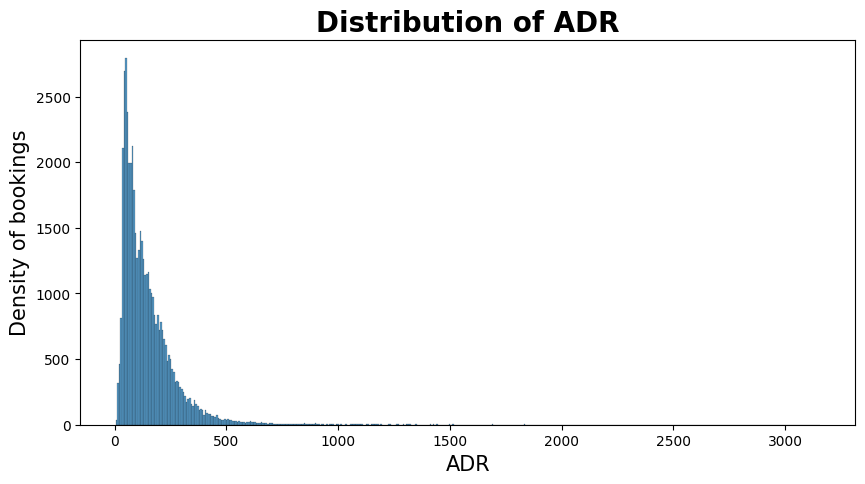

In [164]:
plt.figure(figsize=(10, 5))
sns.histplot(x='ADR_USD', data=data)
plt.title('Distribution of ADR',fontweight='bold',fontsize=20)
plt.xlabel('ADR',fontsize=15)
plt.ylabel('Density of bookings',fontsize=15)
plt.show()

The above distribution is highly skewed so using IQR technique to make it balanced.

In [165]:
Q1 = np.quantile(data.ADR_USD, 0.25)
Q3 = np.quantile(data.ADR_USD, 0.75)
IQR = Q3 - Q1
temp = data[~((data.ADR_USD < Q1 - 1.5 * IQR) | (data.ADR_USD > Q3 + 1.5 * IQR))]
temp.describe()

,ADR_USD,booking_date,checkin_date,checkout_date,lead_time
count,45986.000000,45986,45986,45986,45986.000000
mean,128.684417,2016-11-01 22:46:26.622015488,2016-11-16 09:25:33.597181696,2016-11-18 01:42:40.692384512,14.443831
min,4.260000,2016-08-02 00:00:00,2016-10-01 00:00:00,2016-10-02 00:00:00,-1.000000
25%,61.000000,2016-10-10 00:00:00,2016-10-23 00:00:00,2016-10-25 00:00:00,2.000000
50%,108.380000,2016-11-02 00:00:00,2016-11-17 00:00:00,2016-11-19 00:00:00,8.000000
75%,178.605000,2016-11-26 00:00:00,2016-12-10 00:00:00,2016-12-11 00:00:00,23.000000
max,386.800000,2016-12-31 00:00:00,2016-12-31 00:00:00,2017-01-03 00:00:00,60.000000
std,82.621040,NaN,NaN,NaN,15.611833


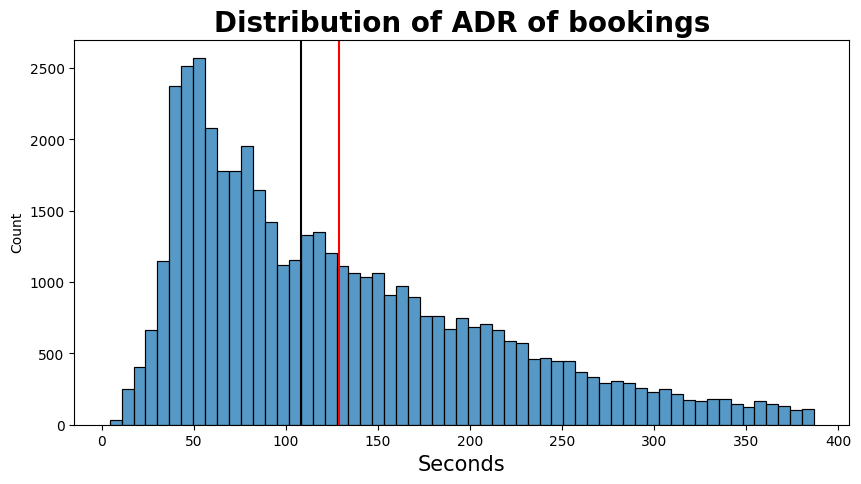

In [166]:
plt.figure(figsize=(10, 5))
sns.histplot(temp.ADR_USD)
plt.axvline(temp.ADR_USD.mean(), c = 'red')
plt.axvline(temp.ADR_USD.median(), c = 'black')
plt.xlabel('Seconds',color='black',fontsize=15)
plt.title('Distribution of ADR of bookings',color='black',fontsize=20,fontweight='bold')
plt.show()

Now distribution of ADR iis more balanced with range from "4 dollars" to "386 dollars" and average being $128.68.

Skewness of ADR_USD: 4.470231682371409
Standard deviation of ADR_USD: 135.3174826313886


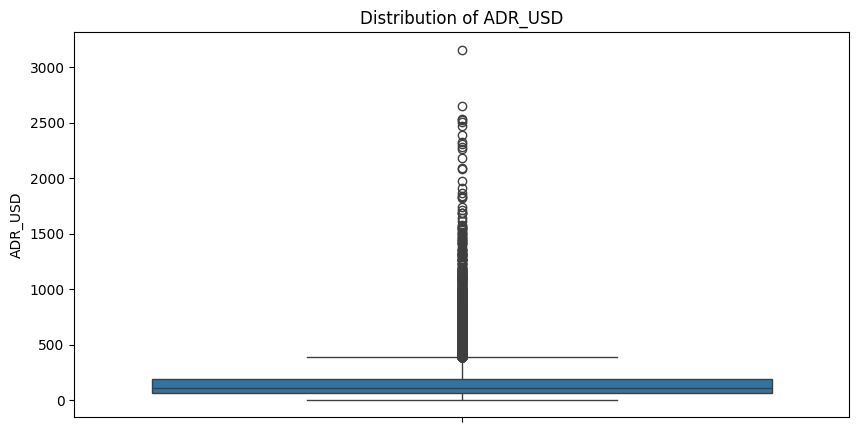

Skewness of lead_time: 1.1432282557324447
Standard deviation of lead_time: 15.693109592766481


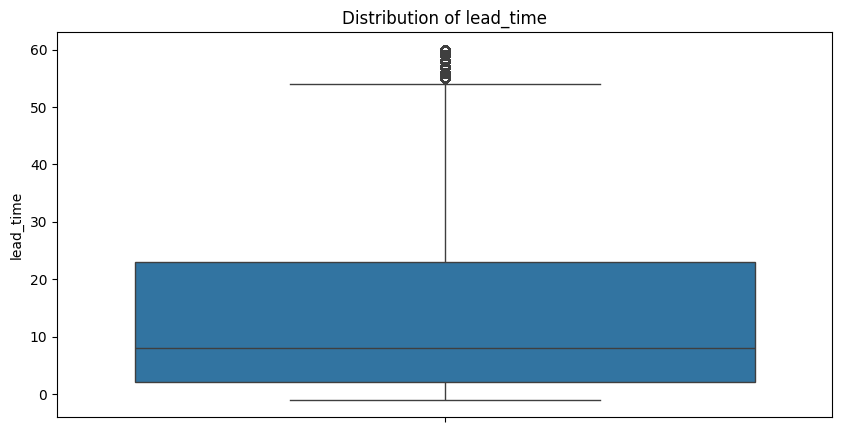

In [167]:
for col in data.select_dtypes(include = np.number).columns:
    plt.figure(figsize = (10, 5))
    print(f'Skewness of {col}: {data[col].skew()}')
    print(f'Standard deviation of {col}: {data[col].std()}')
    sns.boxplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.show()

Now using IQR technique to reduce skewness in ADR and Lead time.

In [168]:
final=data.copy()
final.info()
final = final[final['lead_time'] >= 0] #whose lead time<0 => fraud data or meaningless data

<class 'pandas.core.frame.DataFrame'>
Index: 48036 entries, 0 to 49063
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ADR_USD                  48036 non-null  float64       
 1   hotel_id                 48036 non-null  object        
 2   city_id                  48036 non-null  object        
 3   star_rating              48036 non-null  object        
 4   accommadation_type_name  48036 non-null  object        
 5   chain_hotel              48036 non-null  object        
 6   booking_date             48036 non-null  datetime64[ns]
 7   checkin_date             48036 non-null  datetime64[ns]
 8   checkout_date            48036 non-null  datetime64[ns]
 9   city                     48036 non-null  object        
 10  lead_time                48036 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(1), object(6)
memory usage: 4.4+ MB


In [169]:
for i in final.select_dtypes(include = np.number).columns:

    q1 = final[i].quantile(0.25)
    q3 = final[i].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    final[i] = np.where(final[i]>ul,ul,final[i])
    final[i] = np.where(final[i]<ll,ll,final[i])

Skewness of ADR_USD: 1.0469533607549828
Standard deviation of ADR_USD: 96.22265288957664


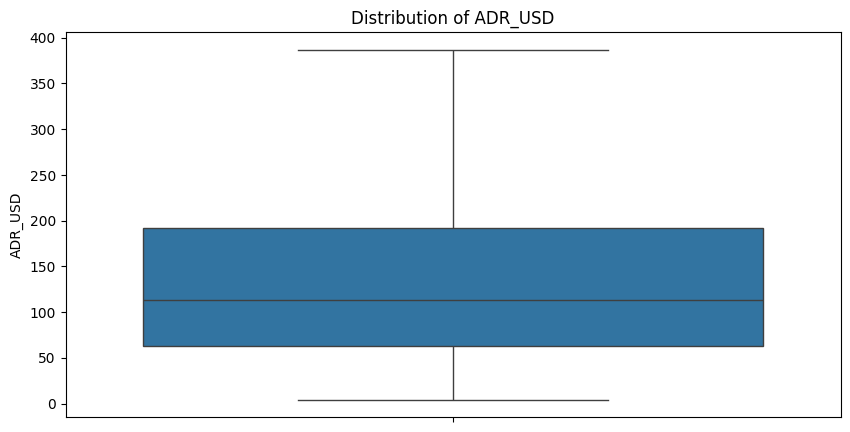

Skewness of lead_time: 1.1001225207713932
Standard deviation of lead_time: 15.505821806438343


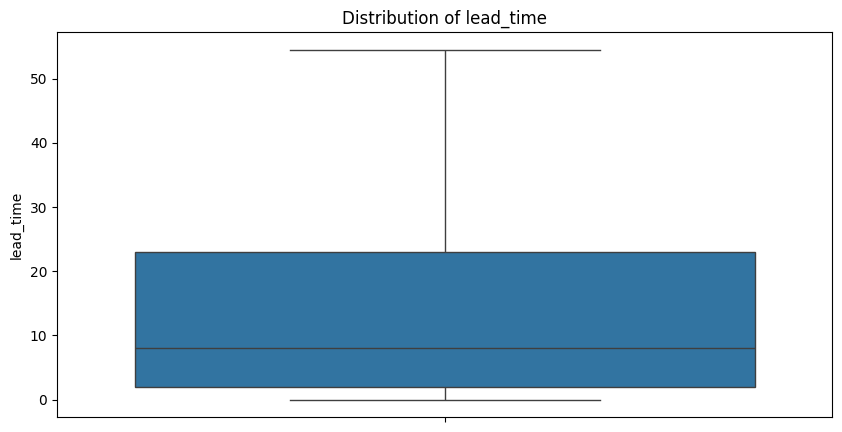

In [170]:
for col in final.select_dtypes(include = np.number).columns:

    plt.figure(figsize = (10, 5))
    print(f'Skewness of {col}: {final[col].skew()}')
    print(f'Standard deviation of {col}: {final[col].std()}')
    sns.boxplot(final[col])
    plt.title(f'Distribution of {col}')
    plt.show()

Now data is less skewed and we can start different analysis.

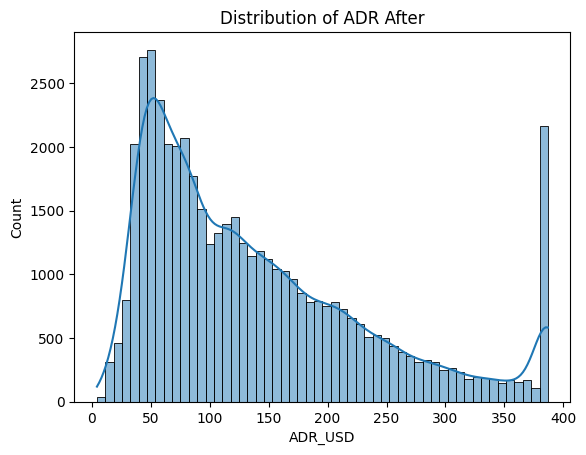

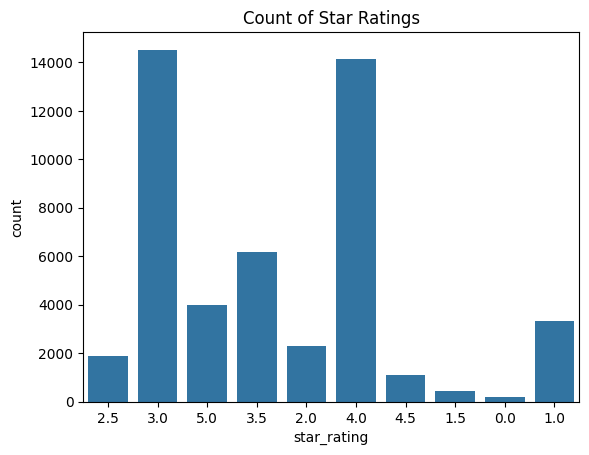

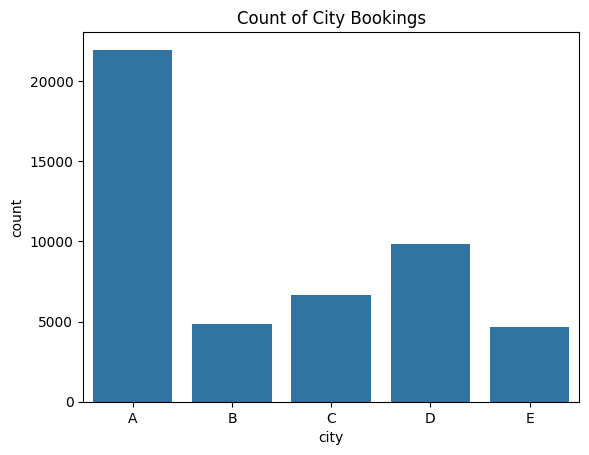

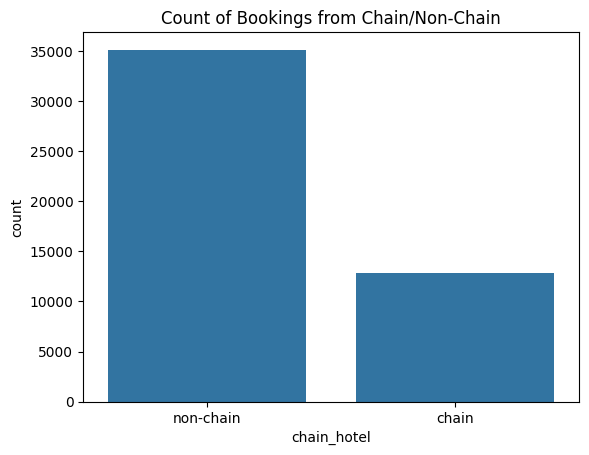

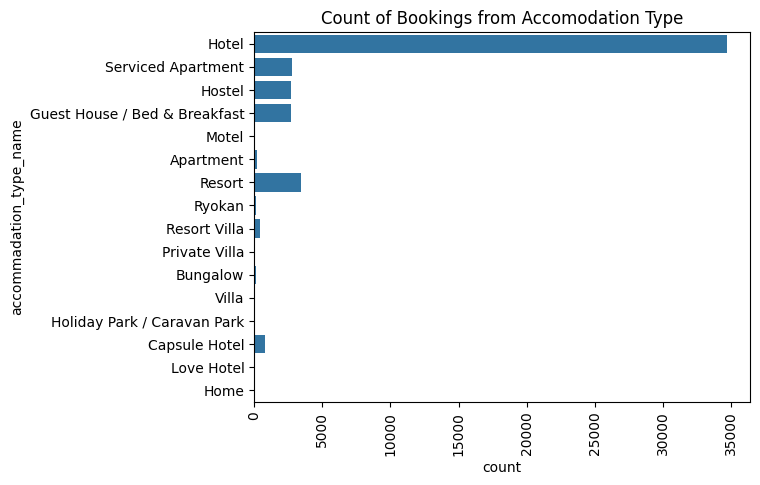

In [171]:
#univariate analysis

# distribution of ADR
sns.histplot(final['ADR_USD'], kde=True)
plt.title('Distribution of ADR After')
plt.show()

# count of Star ratings
sns.countplot(x='star_rating', data=final)
plt.title('Count of Star Ratings')
plt.show()

# count of city bookings
sns.countplot(x='city', data=final)
plt.title('Count of City Bookings')
plt.show()

# count of city bookings
sns.countplot(x='chain_hotel', data=final)
plt.title('Count of Bookings from Chain/Non-Chain')
plt.show()

# count of city bookings
sns.countplot(y='accommadation_type_name', data=final)
plt.title('Count of Bookings from Accomodation Type')
plt.xticks(rotation=90)
plt.show()




**Observations from Univariate Analysis**
*   Most of ADR is between 0-150 USD and 350-400 USD.
*   Most of the properties are 3 star and 4 star.
*   City A get most of the bookings followed by D and C.
*   Most of the properties are non-chain.
*   Most of the accomodation type are Hotel.






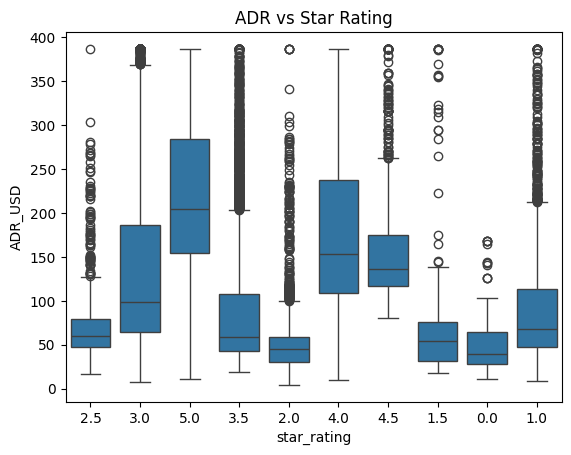

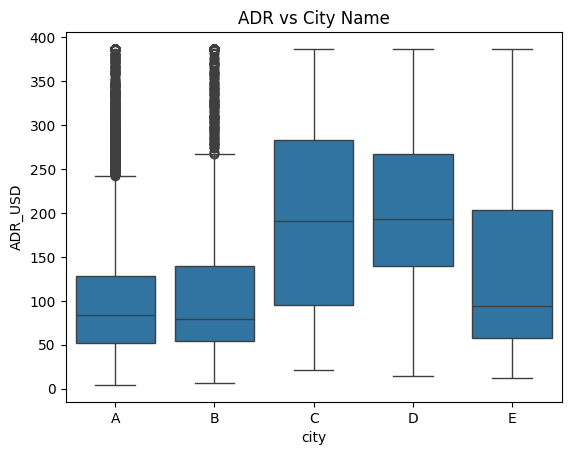

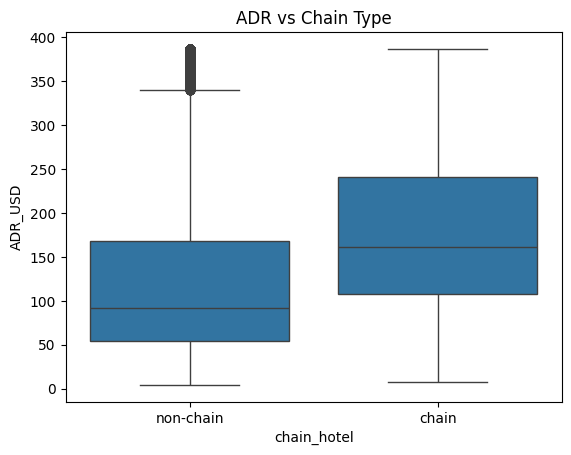

In [172]:
# ADR vs Star Rating
sns.boxplot(x='star_rating', y='ADR_USD', data=final)
plt.title('ADR vs Star Rating')
plt.show()

# ADR vs City ID
sns.boxplot(x='city', y='ADR_USD', data=final)
plt.title('ADR vs City Name')
plt.show()

# ADR vs chain type
sns.boxplot(x='chain_hotel', y='ADR_USD', data=final)
plt.title('ADR vs Chain Type')
plt.show()



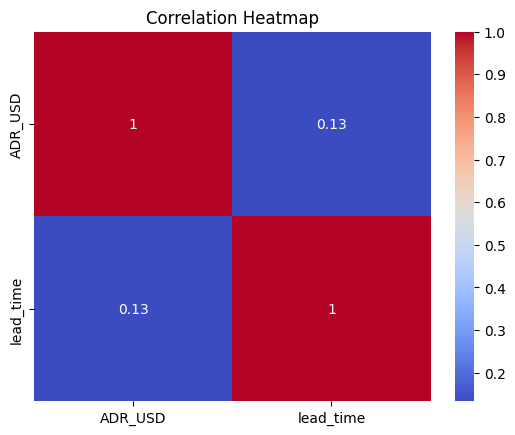

In [173]:
# Correlation heatmap
correlation = final.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


We didn't found much correlation betwwen ADR and lead time.

In [174]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48033 entries, 0 to 49063
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ADR_USD                  48033 non-null  float64       
 1   hotel_id                 48033 non-null  object        
 2   city_id                  48033 non-null  object        
 3   star_rating              48033 non-null  object        
 4   accommadation_type_name  48033 non-null  object        
 5   chain_hotel              48033 non-null  object        
 6   booking_date             48033 non-null  datetime64[ns]
 7   checkin_date             48033 non-null  datetime64[ns]
 8   checkout_date            48033 non-null  datetime64[ns]
 9   city                     48033 non-null  object        
 10  lead_time                48033 non-null  float64       
dtypes: datetime64[ns](3), float64(2), object(6)
memory usage: 4.4+ MB


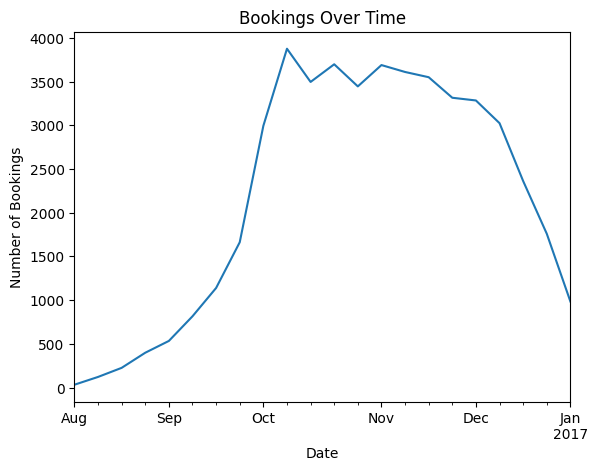

In [175]:

temp=final.copy()
temp.set_index('booking_date', inplace=True)


bookings_over_time = temp.resample('W').size()
bookings_over_time.plot()
plt.title('Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.show()


Above graph is booking over time. Which shows Oct-Dec was peak time where customers were booking.

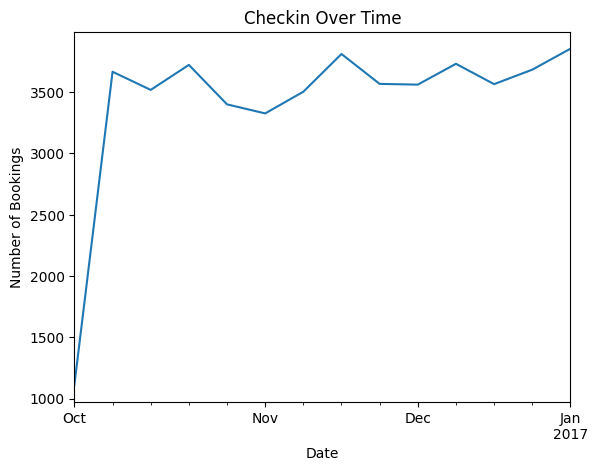

In [176]:

temp=final.copy()
temp.set_index('checkin_date', inplace=True)


bookings_over_time = temp.resample('W').size()
bookings_over_time.plot()
plt.title('Checkin Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.show()

Above graph is checkin over time. Which shows during Nov there was a dip in travelers else hotel room checkin is growing.

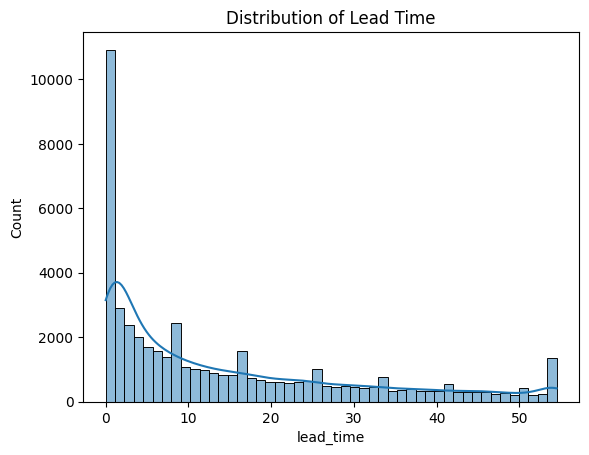

In [177]:

sns.histplot(final['lead_time'], kde=True)
plt.title('Distribution of Lead Time')
plt.show()

The above plot shows that most of the travelers love to book hotel room just 10 days before.

<ipython-input-178-8ea8e2bf925e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lead_time_counts.index, y=lead_time_counts.values, palette='viridis')


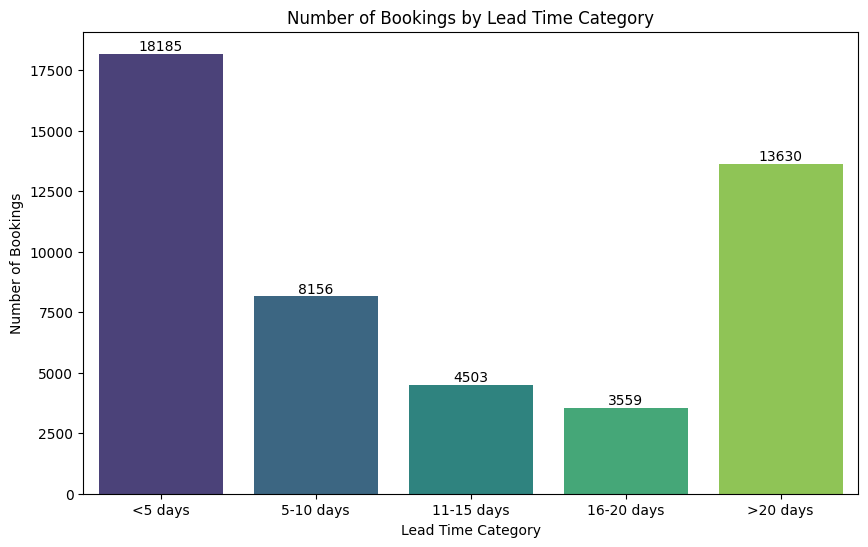

In [178]:


bins = [-1, 4, 10, 15, 20, float('inf')]
labels = ['<5 days', '5-10 days', '11-15 days', '16-20 days', '>20 days']
final['Lead Time Category'] = pd.cut(final['lead_time'], bins=bins, labels=labels)

lead_time_counts = final['Lead Time Category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=lead_time_counts.index, y=lead_time_counts.values, palette='viridis')
plt.xlabel('Lead Time Category')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by Lead Time Category')

for i, value in enumerate(lead_time_counts.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.show()

On inspectings more deeply on previous plot, we found out most customers either prefer to book within 5 days of checkin else they book more than 20 days prior.

In [179]:
TravelCity = final.city.value_counts(normalize = True) * 100
TravelCity

city
A    45.737306
D    20.458851
C    13.877959
B    10.161764
E     9.764121
Name: proportion, dtype: float64

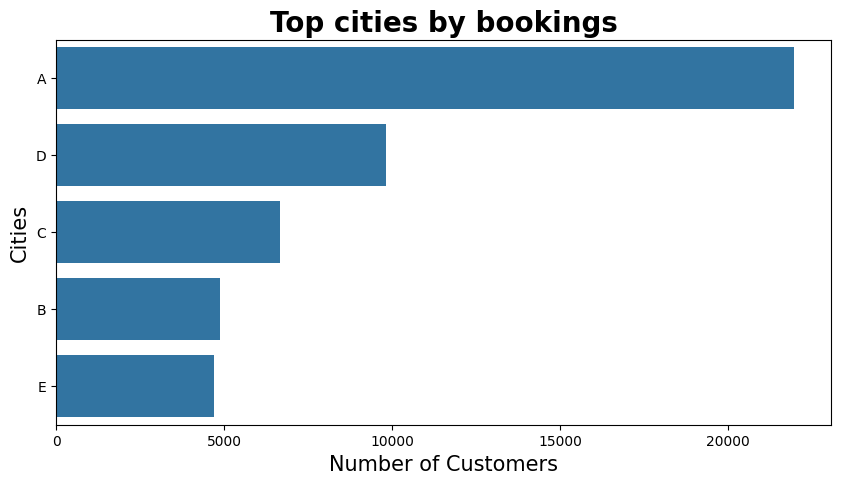

In [180]:
plt.figure(figsize=(10, 5))
sns.barplot(y = final.city.value_counts().index, x = final.city.value_counts().values)
plt.xlabel('Number of Customers',color='black',fontsize=15)
plt.ylabel('Cities',color='black',fontsize=15)
plt.title('Top cities by bookings',color='black',fontsize=20,fontweight='bold')
plt.show()

A and D has most number of hotel bookings.

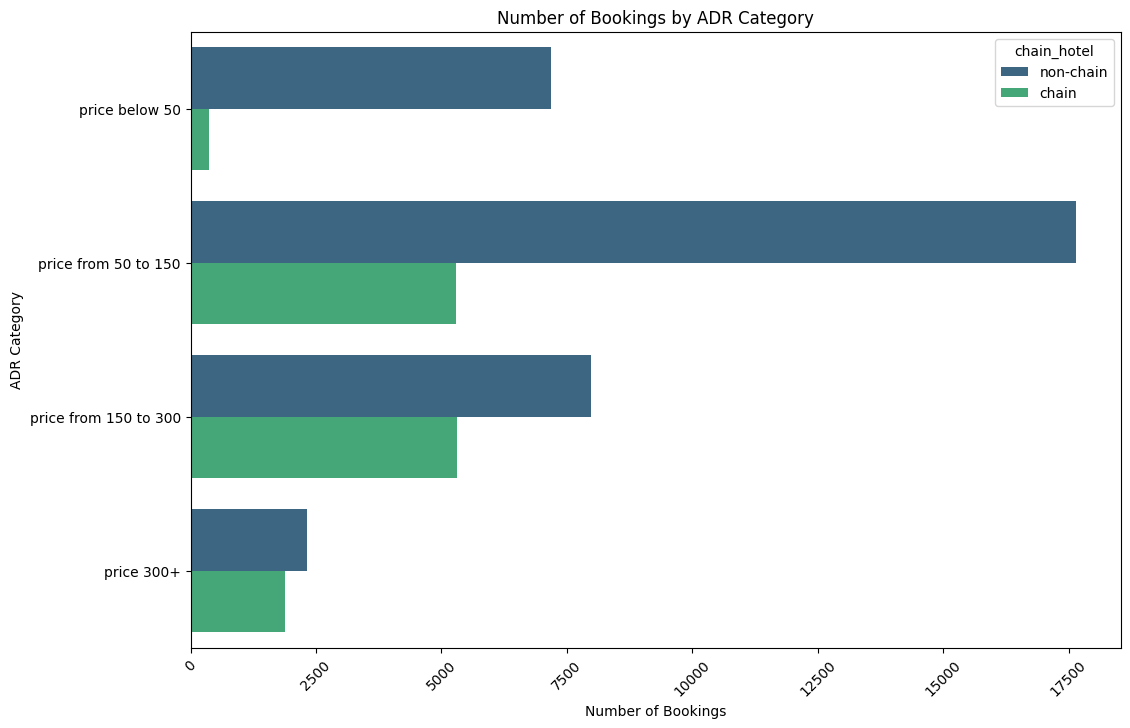

In [181]:

def avg_adr(x):
    if x <= 50.0:
        return 'price below 50'
    elif x > 50.0 and x <= 150.0:
        return 'price from 50 to 150'
    elif x > 150.0 and x <= 300.0:
        return 'price from 150 to 300'
    else:
        return 'price 300+'

final['ADR_Category'] = final['ADR_USD'].apply(avg_adr)

plt.figure(figsize=(12, 8))
sns.countplot(y='ADR_Category', data=final, order=['price below 50', 'price from 50 to 150', 'price from 150 to 300', 'price 300+'],hue='chain_hotel', palette='viridis')
plt.title('Number of Bookings by ADR Category')
plt.ylabel('ADR Category')
plt.xlabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

Above chart shows most of the properties have ADR between 50-150 USD and as the prices of ADR increases in properties, more likely they are to be a 'chain' hote type.

In [182]:
final.isnull().sum()

ADR_USD                    0
hotel_id                   0
city_id                    0
star_rating                0
accommadation_type_name    0
chain_hotel                0
booking_date               0
checkin_date               0
checkout_date              0
city                       0
lead_time                  0
Lead Time Category         0
ADR_Category               0
dtype: int64

In [183]:
final.fillna(final.mode().iloc[0], inplace=True)
data=final.copy()
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48033 entries, 0 to 49063
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ADR_USD                  48033 non-null  float64       
 1   hotel_id                 48033 non-null  object        
 2   city_id                  48033 non-null  object        
 3   star_rating              48033 non-null  object        
 4   accommadation_type_name  48033 non-null  object        
 5   chain_hotel              48033 non-null  object        
 6   booking_date             48033 non-null  datetime64[ns]
 7   checkin_date             48033 non-null  datetime64[ns]
 8   checkout_date            48033 non-null  datetime64[ns]
 9   city                     48033 non-null  object        
 10  lead_time                48033 non-null  float64       
 11  Lead Time Category       48033 non-null  category      
 12  ADR_Category             48033 non-nu



> **Q1.  Proximity of booking dates to travel dates across various cities and star-rated hotels**



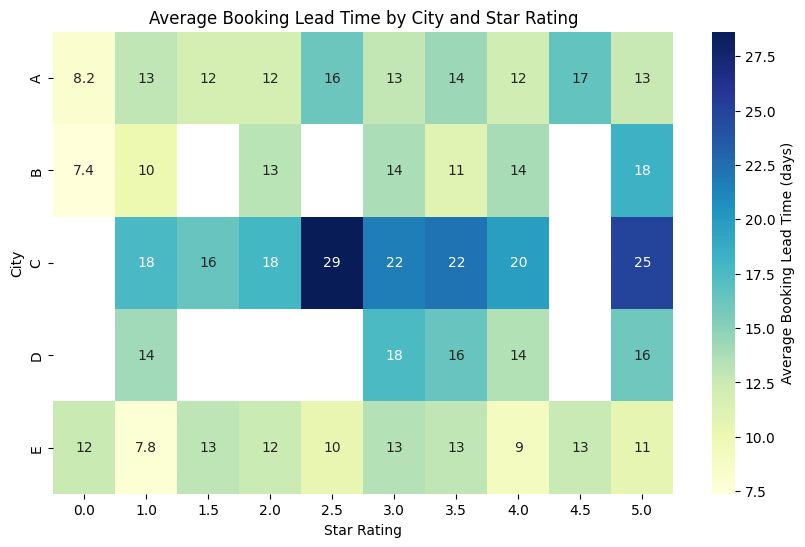

In [184]:



lead_time_analysis = data.groupby(['city', 'star_rating'])['lead_time'].mean().reset_index()


lead_time_pivot = lead_time_analysis.pivot(index='city', columns='star_rating', values='lead_time')

plt.figure(figsize=(10, 6))
sns.heatmap(lead_time_pivot, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Average Booking Lead Time (days)'})
plt.title('Average Booking Lead Time by City and Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('City')
plt.show()



> *Observations:*





1.   **City A:**

*   The average booking lead time ranges from about 8 to 17 days across different star ratings.
*   Hotel with 0-star  ratings have the shortest lead times (8.2 days).
*   4.5-star and 2.5 star hotels have a relatively longer lead time of 17 & 16 days respectively.




2.   **City B:**

*   The average booking lead time ranges from about 7.4 to 18 days.
*   0-star hotels have the shortest lead time (7.4 days), while 5-star hotels have the longest (18 days).
*   There is no data for some star ratings (2 and 3-star hotels).

3.   **City C:**

*   This city shows a wider range of booking lead times, from 16 to 29 days.
*   The longest lead time is for 2.5-star hotels (29 days), which is significantly higher than other star ratings.
*   1.5-star hotels have lead times of 16 days.

4.   **City D:**

*   The average booking lead time ranges from about 14 to 18 days.
*   There is no data for certain star ratings (0, 1.5, 2.0, 2.5 and 4.5-star hotels).
*   Lead times for available ratings are relatively consistent, ranging from 14 to 18 days.

5.   **City E:**

*   The average booking lead time ranges from about 7.8 to 13 days.
*   The shortest lead time is for 1-star hotels (7.8 days), while the longest is for 1.5, 3.0, 3.5 & 4.5-star hotels (13 days).
*   Other ratings show relatively similar lead times, mostly between 10 to 13 days.

















> *Insights:*








1.   **Variation Across Cities:**


*   City C generally has higher booking lead times compared to other cities, especially for 2.5-star hotels.
*   City A and City D have moderate and relatively consistent booking lead times across different star ratings.





2.   **Impact of Star Rating:**


*   Higher star-rated hotels (4 and 5 stars) in some cities (like City A and City B) tend to have longer booking lead times, indicating that customers might book these hotels further in advance.
*   However, there are exceptions, like City E, where 1-star hotels have a shorter lead time compared to higher-rated hotels.


3.   **Outliers:**


*   The 2.5-star hotels in City C stand out with an exceptionally high booking lead time (29 days), indicating a possible preference or requirement for earlier bookings in this category.



4.   **Data Gaps:**


*   Some star ratings are missing in cities like City B and City D, which might indicate a lack of hotels with those ratings in those cities or insufficient data for those categories.







> **Q2.1.  Fluctuations of ADR (Average Daily Rate) of a hotel with respect to the booking date and check-in date.**



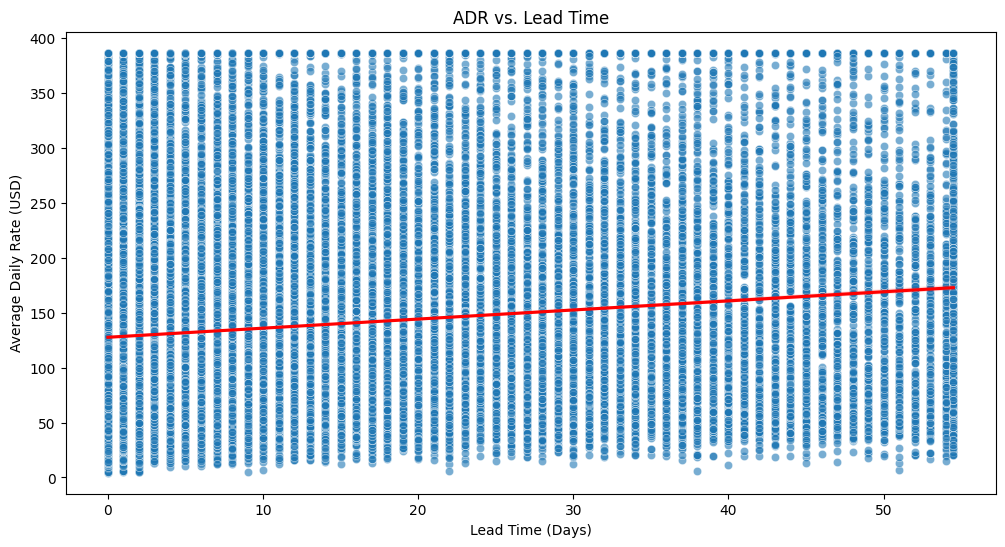

In [185]:
# Scatter plot of ADR vs. lead time (difference between booking date and check-in date)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='lead_time', y='ADR_USD', data=data, alpha=0.6)
sns.regplot(x='lead_time', y='ADR_USD', data=data, scatter=False, color='red')

plt.title('ADR vs. Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Average Daily Rate (USD)')
plt.show()

The scatter plot with a regression line indicates a slight positive correlation between lead time and ADR, but it does not fully answer the question.

In [186]:
data['booking_month'] = data['booking_date'].dt.month
data['booking_day_of_week'] = data['booking_date'].dt.dayofweek
data['checkin_month'] = data['checkin_date'].dt.month
data['checkin_day_of_week'] = data['checkin_date'].dt.dayofweek


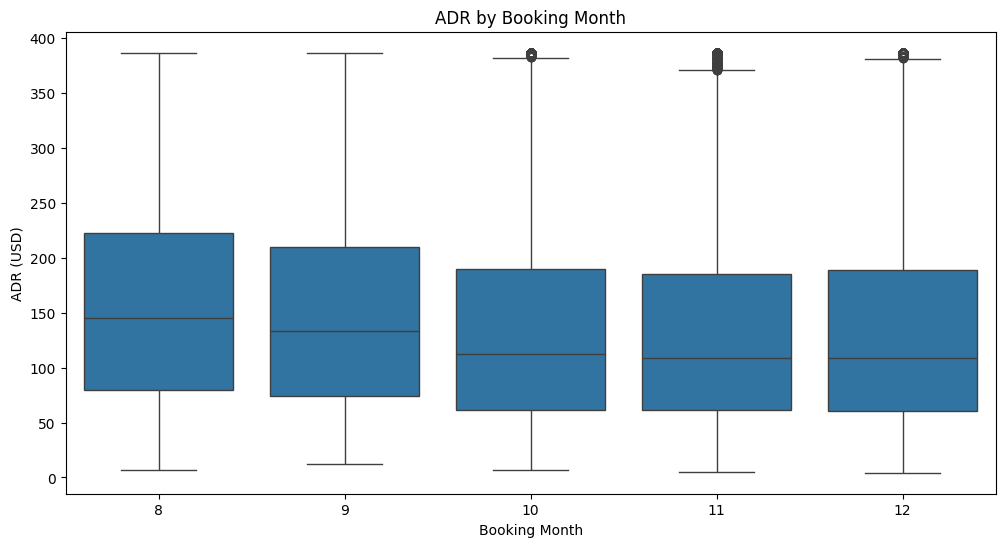

In [187]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='booking_month', y='ADR_USD', data=data)
plt.title('ADR by Booking Month')
plt.xlabel('Booking Month')
plt.ylabel('ADR (USD)')
plt.show()


ADR by Booking Month: The boxplot shows the distribution of ADR across different booking months. There's some variation, which suggests the month of booking might influence the ADR.

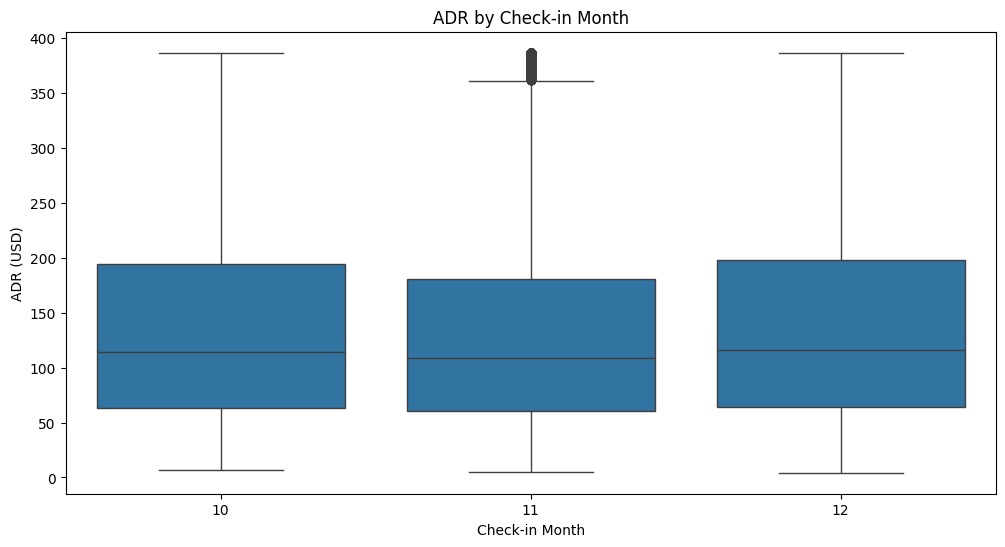

In [188]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='checkin_month', y='ADR_USD', data=data)
plt.title('ADR by Check-in Month')
plt.xlabel('Check-in Month')
plt.ylabel('ADR (USD)')
plt.show()


ADR by Check-in Month: Similar to the booking month, the ADR varies across different check-in months, indicating a potential influence.

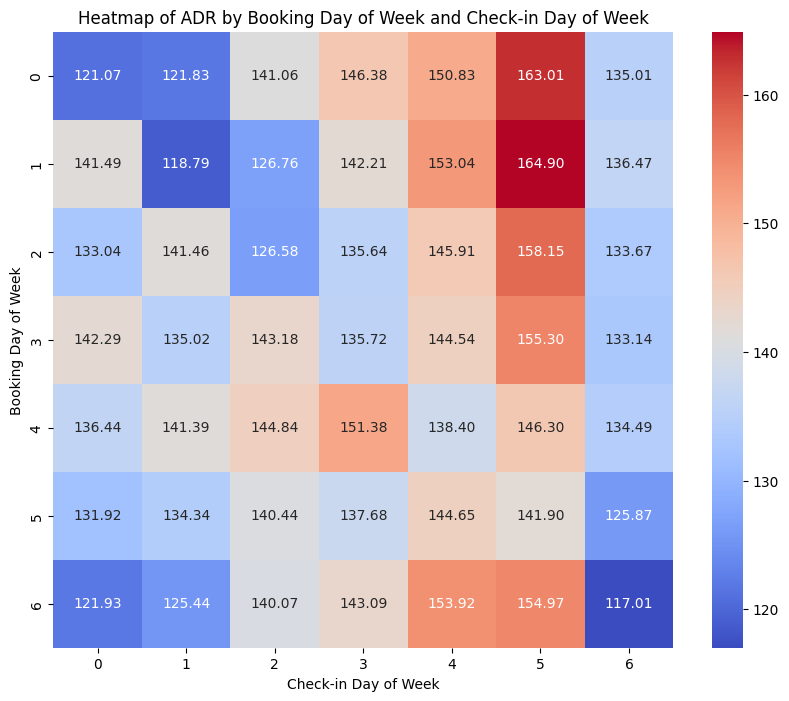

In [189]:
heatmap_data = data.pivot_table(values='ADR_USD', index='booking_day_of_week', columns='checkin_day_of_week', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of ADR by Booking Day of Week and Check-in Day of Week')
plt.xlabel('Check-in Day of Week')
plt.ylabel('Booking Day of Week')
plt.show()


This heatmap shows the average ADR for each combination of booking day and check-in day. It indicates some variability, suggesting that both booking and check-in days might influence the ADR.

In [190]:
import statsmodels.api as sm

# Prepare the data for regression
X = data[['booking_month', 'booking_day_of_week', 'checkin_month', 'checkin_day_of_week', 'lead_time']]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = data['ADR_USD']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                ADR_USD   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     203.7
Date:                Mon, 27 May 2024   Prob (F-statistic):          1.11e-215
Time:                        17:30:59   Log-Likelihood:            -2.8700e+05
No. Observations:               48033   AIC:                         5.740e+05
Df Residuals:                   48027   BIC:                         5.741e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 122.9086    



1.   The R-squared value of 0.021 indicates that about 2.1% of the variability in ADR can be explained by the model. This suggests other factors not included in the model might also play significant roles.
2.   Booking Month: The positive coefficient (5.7682) and suggest that booking month has a significant positive impact on ADR.


3.   Check-in Month: The negative coefficient (-5.8018) indicate that check-in month has a significant negative impact on ADR.
4.   Check-in Day of Week: The positive coefficient (2.4249) suggest a positive impact of the check-in day of the week on ADR.


5.   Lead Time: The positive coefficient (0.9910) show a significant positive relationship between lead time and ADR.



> The analysis shows that ADR is indeed influenced by both the booking date (month and day of the week) and the check-in date (month and day of the week), as well as the lead time between booking and check-in.













> **Q2.2.    ADR (Average Daily Rate) of hotels that are unaffected.**



In [191]:

adr_std_by_hotel_city = data.groupby(['city', 'hotel_id'])['ADR_USD'].std().reset_index()

threshold = 10 #Asuming thresold 10 USD


unaffected_hotels = adr_std_by_hotel_city[adr_std_by_hotel_city['ADR_USD'] < threshold]


unaffected_hotels_count_by_city = unaffected_hotels.groupby('city')['hotel_id'].count().reset_index()
unaffected_hotels_count_by_city.columns = ['City Name', 'Unaffected Hotels Count']


total_hotels_by_city = data.groupby('city')['hotel_id'].nunique().reset_index()
total_hotels_by_city.columns = ['City Name', 'Total Hotels Count']


result = pd.merge(unaffected_hotels_count_by_city, total_hotels_by_city, on='City Name')

result['Percentage Unaffected'] = round((result['Unaffected Hotels Count'] / result['Total Hotels Count']) * 100,2)
result=result.drop(['Total Hotels Count'], axis=1)

result.reset_index(drop=True, inplace=True)
print(result)


  City Name  Unaffected Hotels Count  Percentage Unaffected
0         A                       80                  37.56
1         B                      106                  30.81
2         C                       13                   8.90
3         D                        4                   5.71
4         E                       37                  34.58


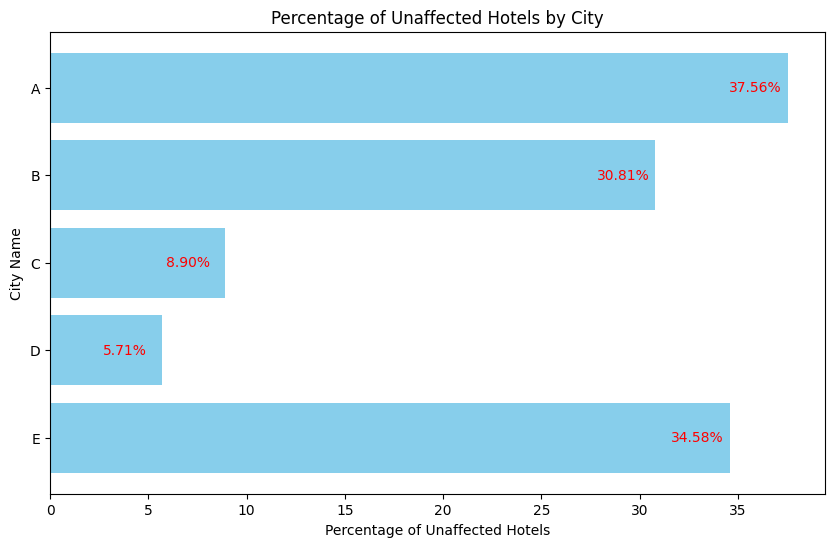

In [192]:

fig, ax1 = plt.subplots(figsize=(10, 6))

bars = ax1.barh(result['City Name'], result['Percentage Unaffected'], color='skyblue')

ax1.barh(result['City Name'], result['Percentage Unaffected'], color='skyblue')
ax1.set_xlabel('Percentage of Unaffected Hotels')
ax1.set_ylabel('City Name')
ax1.set_title('Percentage of Unaffected Hotels by City')
ax1.invert_yaxis()

for i, txt in enumerate(result['Percentage Unaffected']):
    ax1.annotate(f'{txt:.2f}%', (result['Percentage Unaffected'][i] - 3, i), va='center', ha='left', color='red')

The above graph shows that there are many hotel whose ADR remains unchanged and City A, E and B has most of those unchanged ADR hotels whose max change in ADR in less than 10 USD.




> **Q3.  Hotel chain w.r.t number of bookings across cities aqnd impact of star ratings:**



In [193]:

bookings_by_hotel_type_city = data.groupby(['chain_hotel', 'city']).size().reset_index(name='num_bookings')


bookings_pivot = bookings_by_hotel_type_city.pivot(index='city', columns='chain_hotel', values='num_bookings').fillna(0)


# print(bookings_pivot)


bookings_by_hotel_type_city_star = data.groupby(['chain_hotel', 'city', 'star_rating']).size().reset_index(name='num_bookings')


# print(bookings_by_hotel_type_city_star)

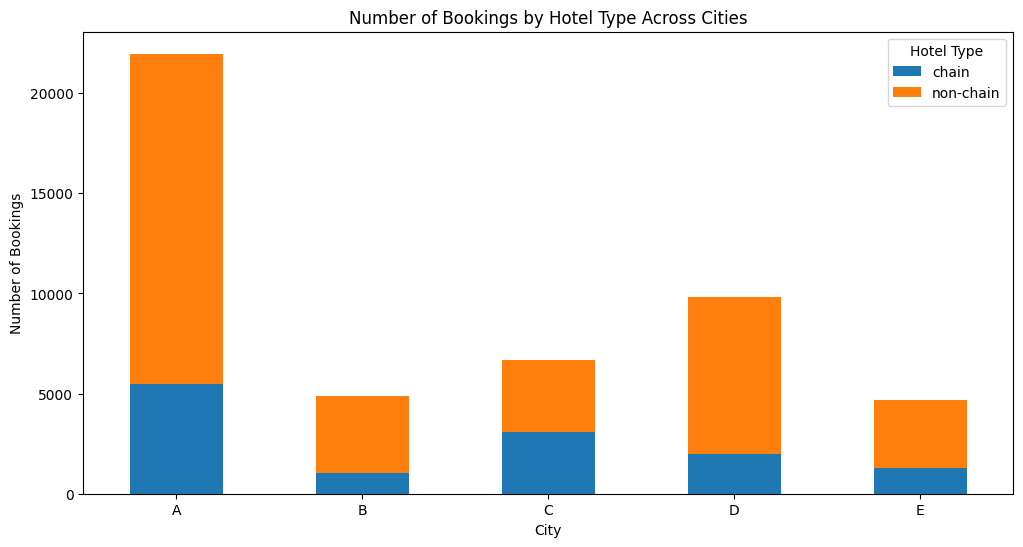

In [194]:


bookings_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))


plt.title('Number of Bookings by Hotel Type Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Bookings')
plt.legend(title='Hotel Type')
plt.xticks(rotation=0)

plt.show()

Across all Cities,  A has the highest number of bookings, "non-chain" hotels are almost dominant in every city.
So **Non-chain** hotels has witnessed more bookings across cities

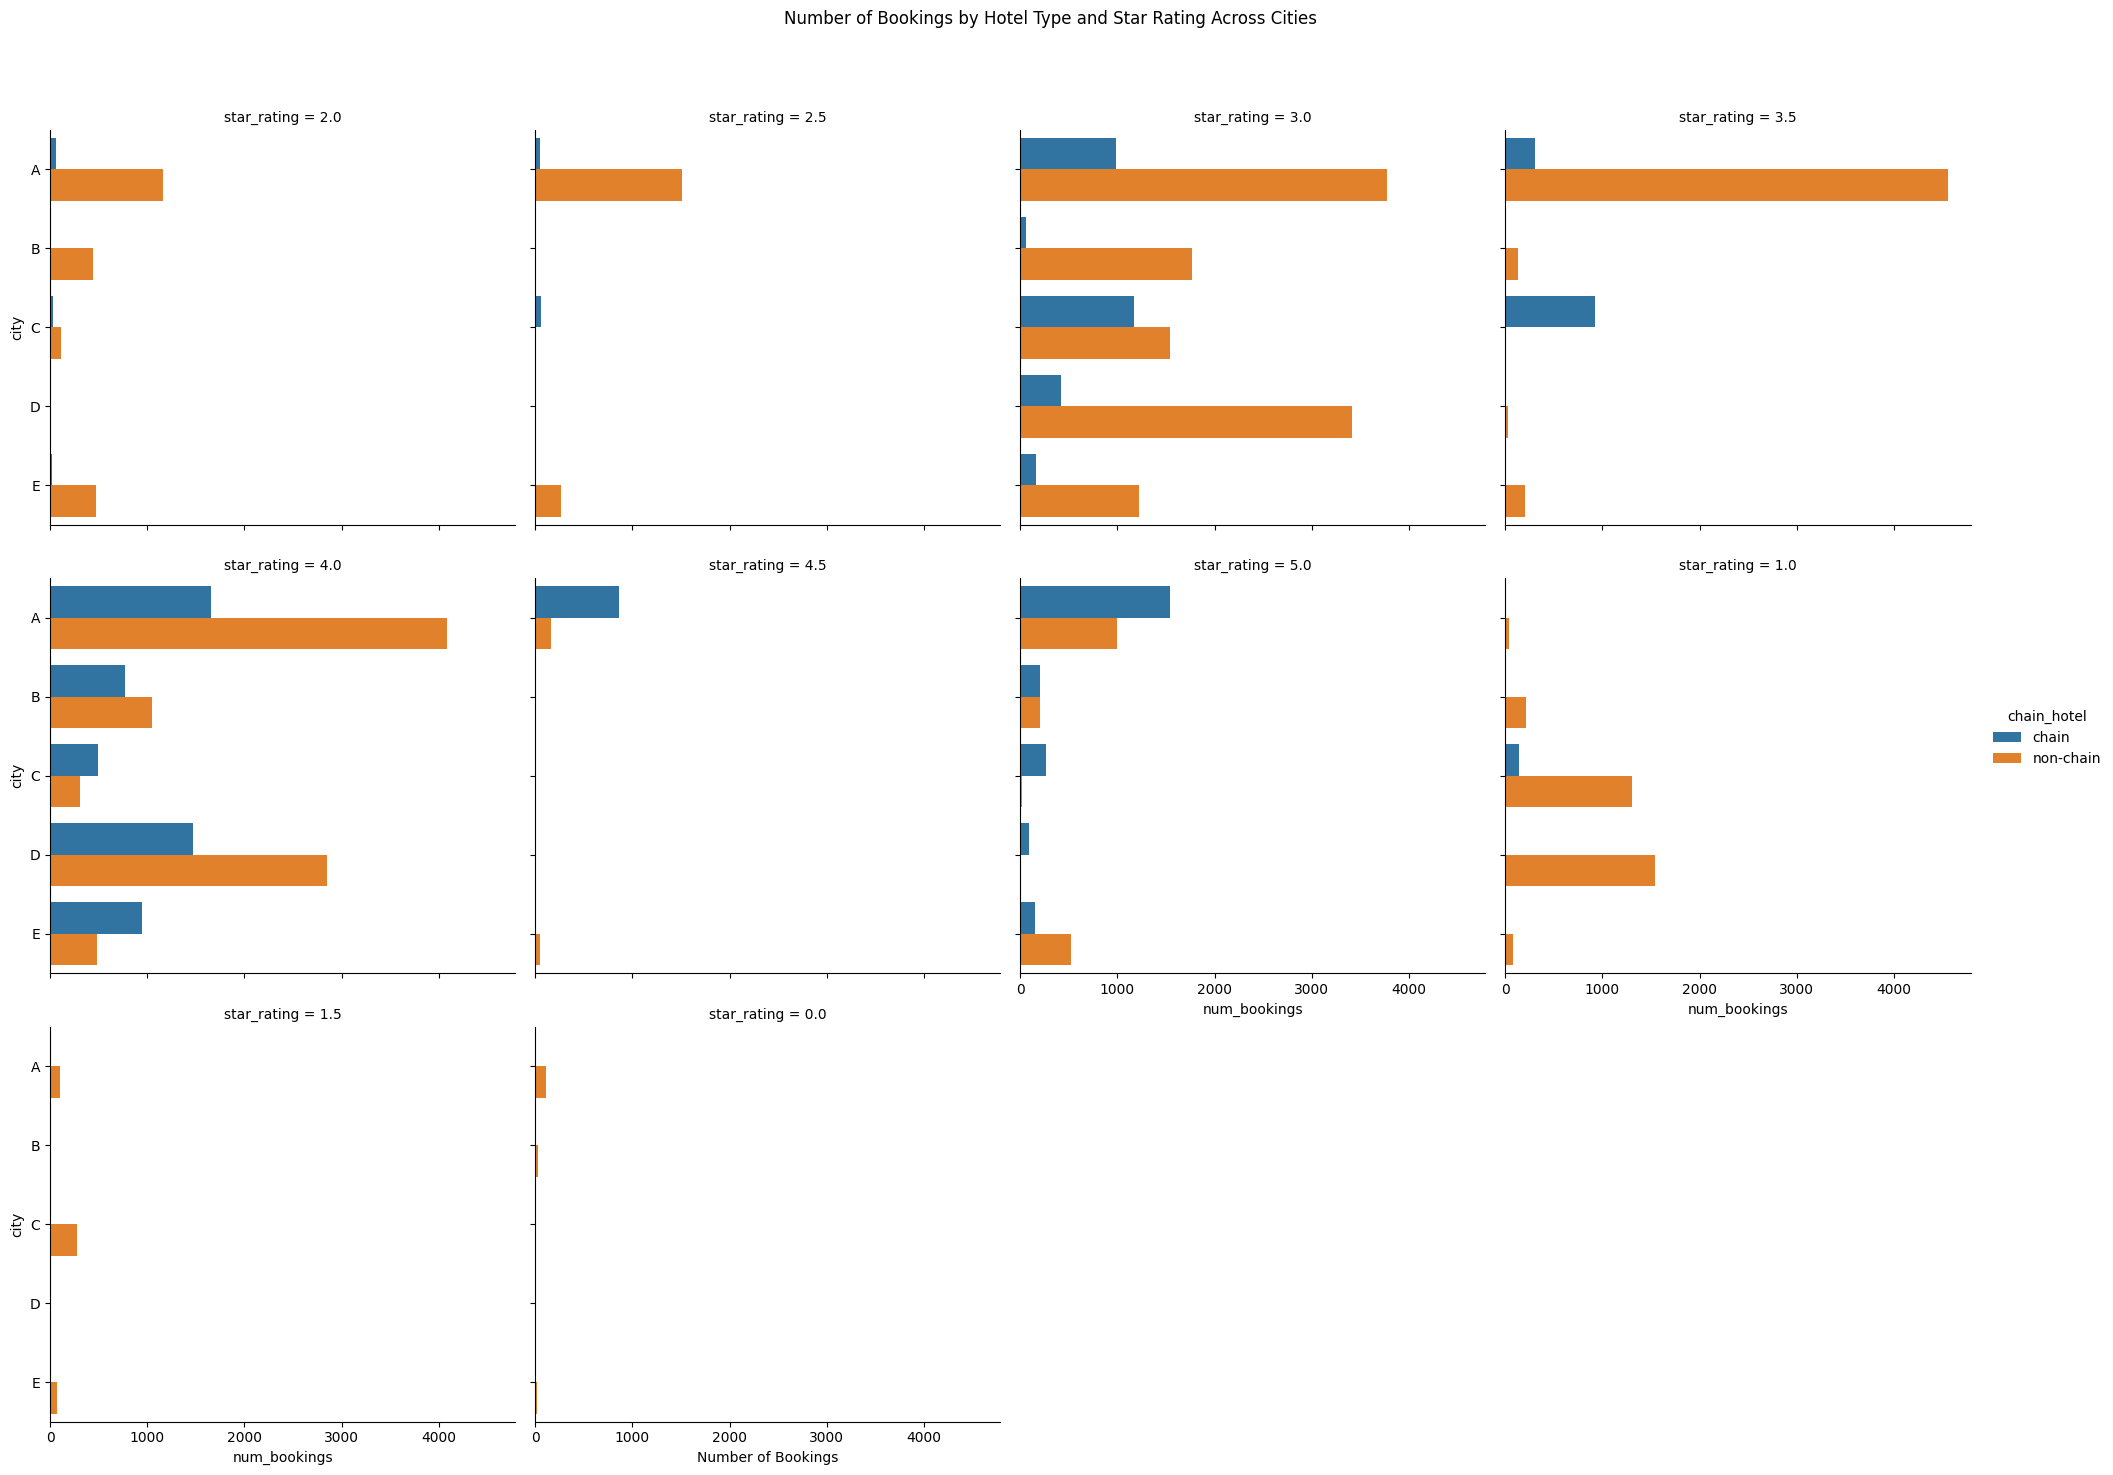

In [195]:
# Plot number of bookings by hotel type and star rating across cities
# plt.figure(figsize=(3, 1.5))
sns.catplot(y='city', x='num_bookings', hue='chain_hotel', col='star_rating', data=bookings_by_hotel_type_city_star, kind='bar', col_wrap=4)
plt.subplots_adjust(top=0.9)
plt.suptitle('Number of Bookings by Hotel Type and Star Rating Across Cities')
plt.ylabel('City')
plt.xlabel('Number of Bookings')
plt.show()

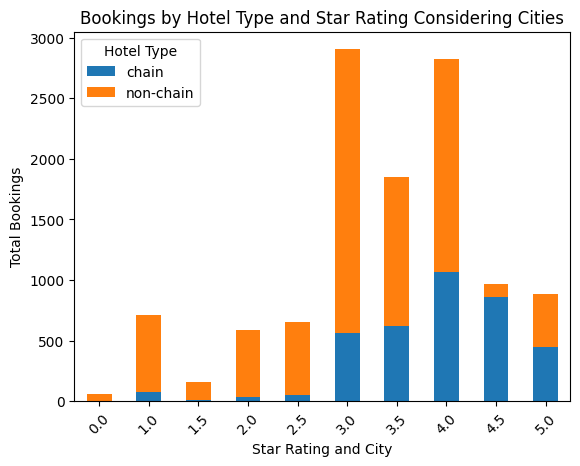

In [196]:
bookings_chain_star_city = data.groupby(['chain_hotel', 'star_rating', 'city']).size().reset_index(name='total_bookings')
# print(bookings_chain_star_city)
stacked_data = bookings_chain_star_city.pivot_table(index=['star_rating'], columns='chain_hotel', values='total_bookings', fill_value=0)

stacked_data.plot(kind='bar', stacked=True)


plt.title('Bookings by Hotel Type and Star Rating Considering Cities')
plt.xlabel('Star Rating and City')
plt.ylabel('Total Bookings')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.show()

The above plot shows that as the star-rating increases, more likely it is a "chain" hotel.




> **Q4.  Weeks with most number of bookings:**



In [197]:

data['booking_week'] = data['booking_date'].dt.isocalendar().week


bookings_by_week = data.groupby('booking_week').size().reset_index(name='num_bookings')

bookings_by_week = bookings_by_week.sort_values(by='num_bookings', ascending=False)


# print(bookings_by_week)

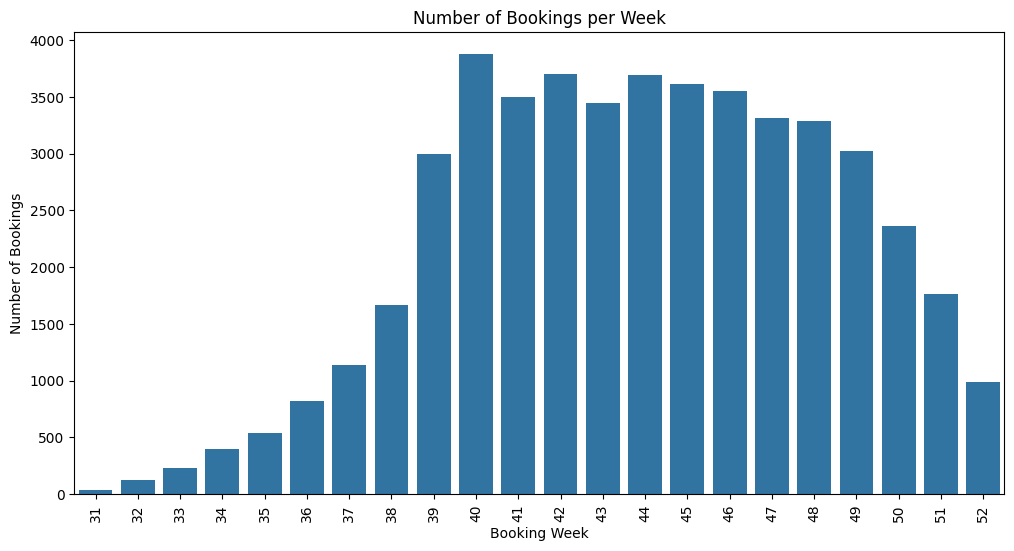

In [198]:

plt.figure(figsize=(12, 6))
sns.barplot(x='booking_week', y='num_bookings', data=bookings_by_week)
plt.title('Number of Bookings per Week')
plt.xlabel('Booking Week')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=90)
plt.show()

Number of booking gradualy increase with time but decreases after week 49.

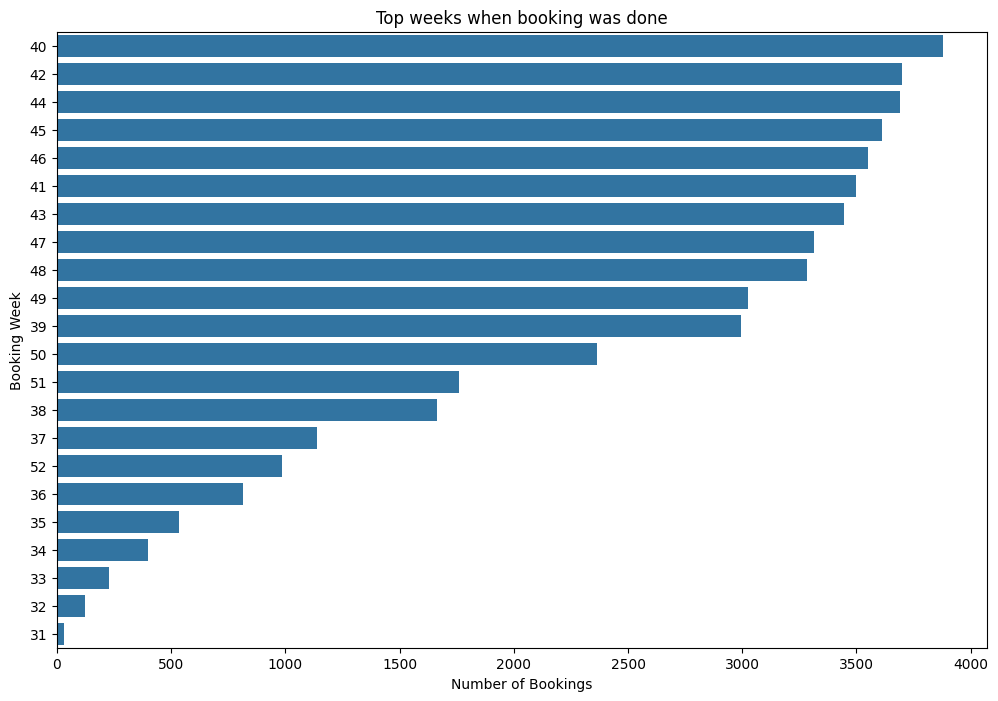

In [199]:

bookings_by_week['booking_week'] = bookings_by_week['booking_week'].astype(str)
order = bookings_by_week['booking_week']


plt.figure(figsize=(12, 8))
sns.barplot(x='num_bookings', y='booking_week', data=bookings_by_week, order=order)
plt.title('Top weeks when booking was done')
plt.xlabel('Number of Bookings')
plt.ylabel('Booking Week')
plt.show()

Highest booking was done in the week 40, followed by 42 and 44.

In [200]:

data['checkin_week'] = data['checkin_date'].dt.isocalendar().week


checkin_by_week = data.groupby('checkin_week').size().reset_index(name='num_bookings')


checkin_by_week = checkin_by_week.sort_values(by='num_bookings', ascending=False)


# print(checkin_by_week)

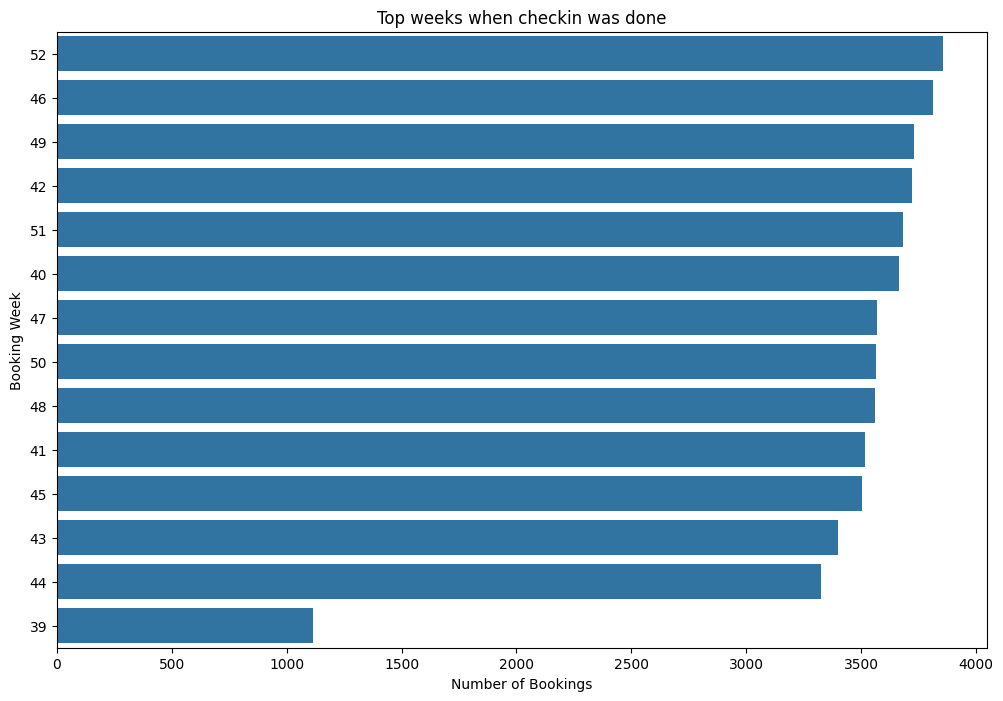

In [201]:

checkin_by_week['checkin_week'] = checkin_by_week['checkin_week'].astype(str)
order = checkin_by_week['checkin_week']

plt.figure(figsize=(12, 8))
sns.barplot(x='num_bookings', y='checkin_week', data=checkin_by_week, order=order)
plt.title('Top weeks when checkin was done')
plt.xlabel('Number of Bookings')
plt.ylabel('Booking Week')
plt.show()

Top weeks when check-in was done during week 52 followed by 46 and 49.